# Importing Libraries

In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re

# Loading data

In [3]:
data = pd.read_csv("spamSMS.csv")
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data visualization

In [4]:
data.shape

(5574, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [7]:
# Get all the ham and spam emails
ham_message = data[data.Class =='ham']
spam_message = data[data.Class=='spam']

In [8]:
ham_message

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5567,ham,Huh y lei...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [9]:
spam_message

,Class,input Text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,Had your contract mobile 11 Mnths? Latest Moto...
5568,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [10]:
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_message["input Text"].to_numpy().tolist())
spam_msg_text = " ".join(spam_message["input Text"].to_numpy().tolist())

In [11]:
ham_msg_text 

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that¬ís the way u feel. That¬ís the wa

In [12]:
spam_msg_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, ¬£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea ¬£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our ¬£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

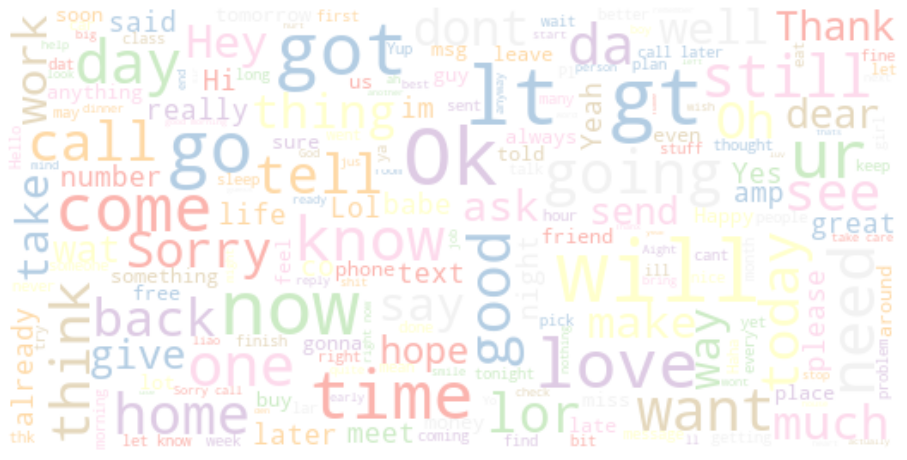

In [60]:
# wordcloud of ham messages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
ham_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white", colormap='Pastel1').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

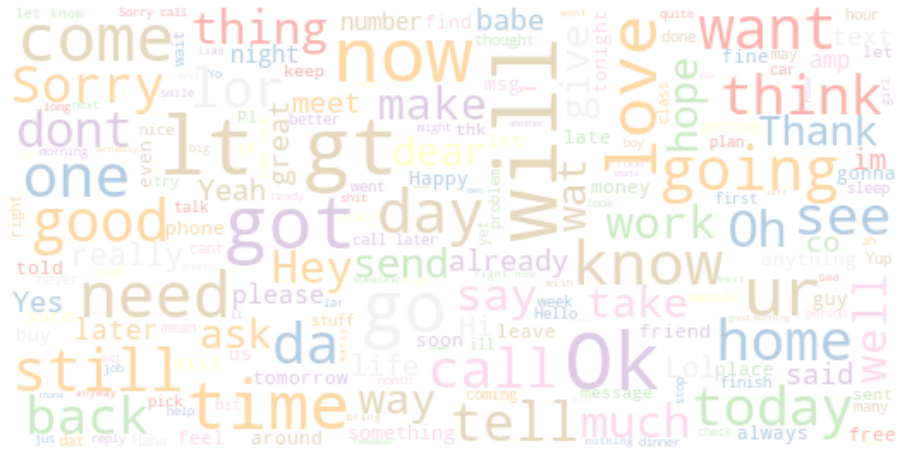

In [14]:
# wordcloud of spam messages
spam_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white", colormap='Pastel1').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Count')

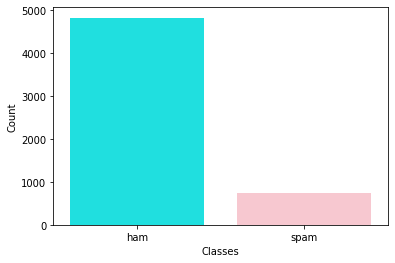

In [15]:
#Checking if the data is imbalanced or not
cols= ["#00FFFF", "#FFC0CB"] #colour palette
bar = sns.countplot(x= data["Class"], palette= cols)
bar.set_xlabel("Classes")
bar.set_ylabel("Count")

Hence, The data imbalance is quite evident here.

**Sampling**

In [16]:
# one way to fix it is to downsample the ham msg
ham_df = ham_message.sample(n = len(spam_message), random_state = 44)
spam_df = spam_message
print(ham_df.shape, spam_df.shape)

(747, 2) (747, 2)


Text(0, 0.5, 'Count')

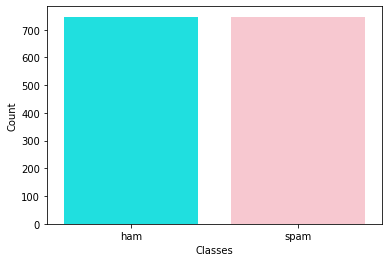

In [17]:
# Create a dataframe with these ham and spam msg
msg_df = ham_df.append(spam_df).reset_index(drop=True)
bar1 = sns.countplot(x= msg_df["Class"], palette= cols)
bar1.set_xlabel("Classes")
bar1.set_ylabel("Count")